# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
insurance_data = pd.read_csv('insurance.csv', delimiter = ',')
print(len(insurance_data))
insurance_data.head()

1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [107]:
# Plot the histogram
age_count_df = pd.DataFrame(insurance_data['age'])
age_count = insurance_data['age'].value_counts()
#age_count.columns = ['age', 'count']
age_count_df
print(len(age_count))

47


[Text(0.5, 1.0, 'Histogram of Age Distribution'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Counts of people')]

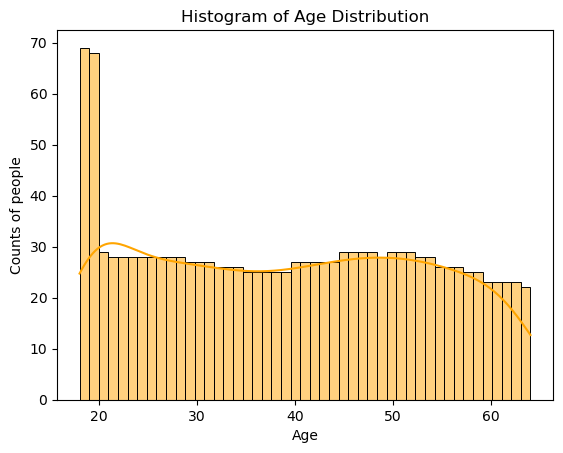

In [123]:
sns.histplot(age_count_df, x="age", 
             kde = True, legend = False, color = 'orange', 
             stat = 'count', bins = 47).set(title='Histogram of Age Distribution',
                                            xlabel='Age', ylabel='Counts of people')

In [5]:
# Calculate the average age
avg_age = insurance_data['age'].mean()
print('The average age of the patients is: {} years.'.format(round(avg_age, 2)))

The average age of the patients is: 39.21 years.


[Text(0.5, 1.0, 'Histrogram of distribution by Region'),
 Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'Number of Counts')]

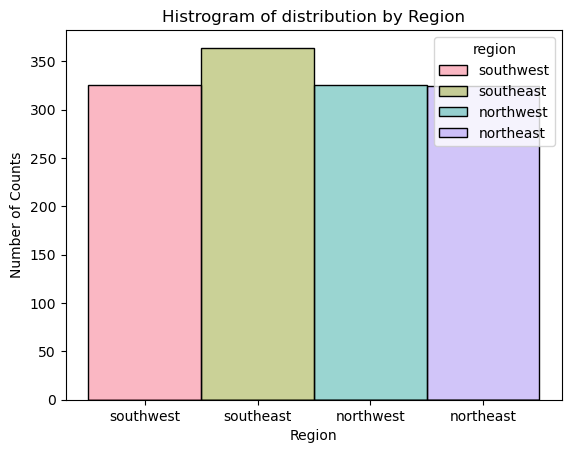

In [124]:
# Count the number of individuals in each region
region_count = insurance_data['region'].value_counts()

region_count_df = pd.DataFrame(insurance_data['region'])
sns.histplot(region_count_df, x="region", hue="region", 
             palette = "husl", binwidth = 0.01).set(title='Histrogram of distribution by Region', 
                                                    xlabel='Region', ylabel='Number of Counts')


In [7]:
# Calculate the average cost for smokers and non-smokers
smoker_costs = insurance_data.groupby('smoker')['charges'].mean()

print('The average cost for non-smokers is:', round(smoker_costs[0], 2))
print('The average cost for smokers is:', round(smoker_costs[1], 2))

The average cost for non-smokers is: 8434.27
The average cost for smokers is: 32050.23


In [8]:
# Create a new dataframe with only the individuals who have at least one child
has_children_df = insurance_data[insurance_data['children'] > 0]

# Calculate the average age of individuals with children
avg_age_children = insurance_data['age'].mean()

print(f'The average age of individuals with children is: {round(avg_age_children, 2)} years.')

The average age of individuals with children is: 39.21 years.


/var/folders/g0/n3dlgtqd06q7zfhtcsnwd9cm0000gn/T/ipykernel_40171/3937691258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_df.corr()


<Axes: >

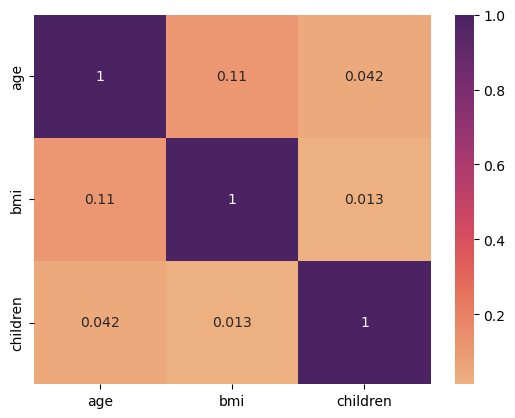

In [9]:
corr_df = insurance_data[['smoker', 'age', 'bmi', 'children']]
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='flare')

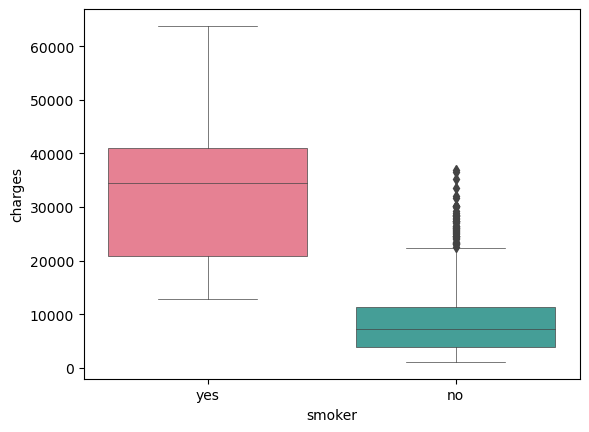

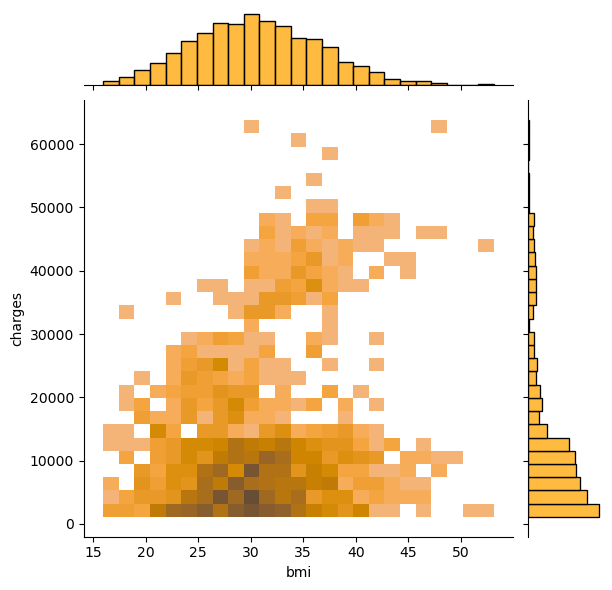

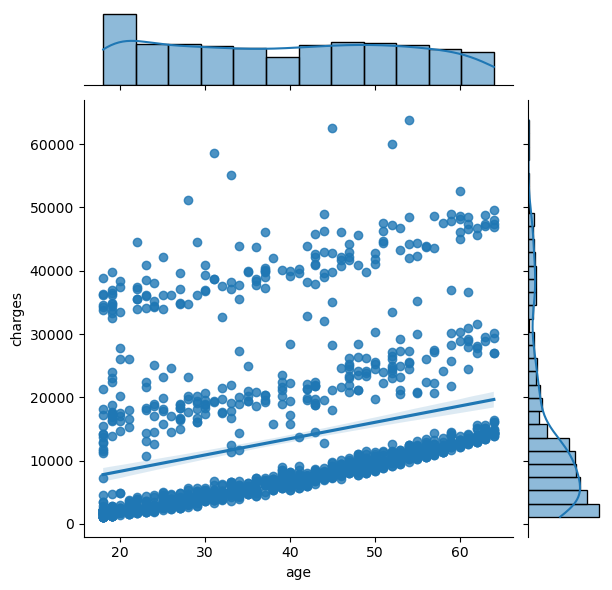

In [130]:
sns.boxplot(x='smoker', y='charges', data=insurance_data, palette = 'husl', linewidth = 0.5)
sns.jointplot(x='bmi', y='charges', data=insurance_data, color = 'orange', kind = 'hist')
sns.jointplot(x='age', y='charges', data=insurance_data,kind='reg')

<Axes: xlabel='children', ylabel='charges'>

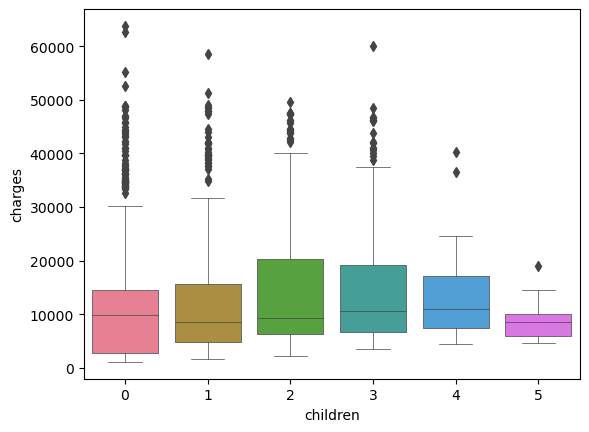

In [11]:
sns.boxplot(x='children', y='charges', data=insurance_data, palette = 'husl', linewidth = 0.5)